# Insights on the frequency axis

In [1]:
# from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In DSIP labs, we are used to represent signals in time and frequency domains as in the next cell.

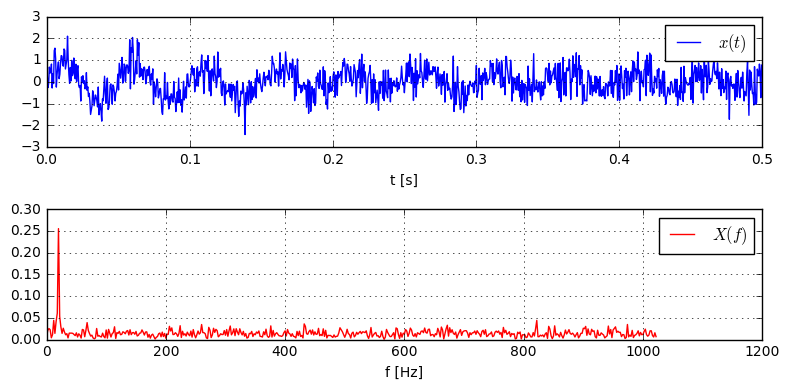

In [2]:
fs = 2048 # sampling frequency
N  = 1024 # number of samples

t = 1/fs * np.arange(N) # time axis
f = fs/N * np.arange(N) # frequency axis

# some signal in the time domain
xt = np.exp(-t/0.3) * np.sin(2*np.pi*20*t) + 0.5 * np.random.randn(N)

# the signal in the frequency domain
Xf = np.fft.fft(xt) / N

plt.figure(figsize=(8, 4))

plt.subplot(2,1,1)
plt.plot(t, xt,'-b',label=r"$x(t)$")
plt.xlabel('t [s]')
plt.legend()
plt.grid()


plt.subplot(2,1,2)
plt.plot(f[:N//2], np.abs(Xf[:N//2]),'-r',label=r"$X(f)$")
plt.xlabel('f [Hz]')
plt.legend()
plt.tight_layout()
plt.grid()

In the plot above, we are representing **only the first half** of the spectum of the signal. Let's take a closer look to the `Python` syntax we are using.

Let's create a `list` containing numbers from `0` to, let' say, `13`, and let's print it.

In [3]:
my_list_of_numbers = list(range(14))
print(my_list_of_numbers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


So, this list has `14` elements, right? Good.

Now, let's print **only the first half**.

In [4]:
print(my_list_of_numbers[:14//2])

[0, 1, 2, 3, 4, 5, 6]


This is definitely not surprising, right? Good.

So, this is **exactly** what we are doing to our frequency axis when we choose to represent **only the positive side of the spectrum**. The first elements of `f = fs/N * np.arange(N)` are the **positive low frequencies**, while the values near the half of the array, on the left, are the **high positive frequency**.

But now, the question is: what about the *negative* frequencies? Where are they?

In order to answer to that question, let's represent the full frequency axis using a signal that has a known Fourier transform: a cosine wave.

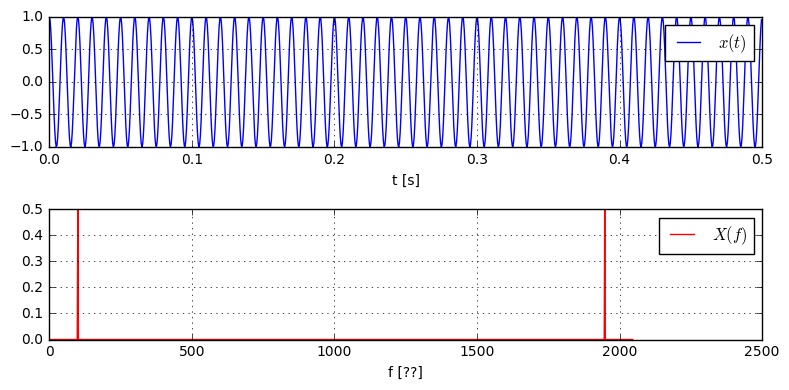

In [5]:
fs = 2048 # sampling frequency
N  = 1024 # number of samples

t = 1/fs * np.arange(N) # time axis
f = fs/N * np.arange(N) # frequency axis

xt = np.cos(2*np.pi*100*t)
Xf = np.fft.fft(xt) / N

plt.figure(figsize=(8, 4))

plt.subplot(2,1,1)
plt.plot(t, xt,'-b',label=r"$x(t)$")
plt.xlabel('t [s]')
plt.legend()
plt.grid()


plt.subplot(2,1,2)
plt.plot(f, np.abs(Xf),'-r',label=r"$X(f)$")
plt.xlabel('f [??]')
plt.legend()
plt.tight_layout()
plt.grid()

What's happening here? Where are my **positive low frequencies** now?

Think about it. As it is often the case, when you *think* that you lost something... probably the thing is not lost at all and, in fact, it is exactly where it is supposed to be!

The **positive low frequencies** are, as always, on the left hand side of the frequency axis. What you should really ask yourself is: *what happens **after** the first half of the frequency axis*? In oder to answer to that question, you can try and think about two facts that you already knew.
1. The spectrum of $cos(2\pi~100~t)$ is made of two *Diract's deltas* placed at $100Hz$ and at $-100Hz$. $$\mathcal{F}[cos(2\pi100t)] = \frac{1}{2}\big[\delta(f-100)+\delta(f+100)\big]$$ As you can see, while the position of the delta on the left is consistent with what you know, the one on the right is not correctly placed.
2. The `FFT` algorithm is an optimized implementation of the *Discrete Fourier Transform*. The *DFT* has the property of being periodic (see <a href="https://en.wikipedia.org/wiki/Discrete_Fourier_transform#Periodicity">here</a> and <a href="http://mathematica.stackexchange.com/questions/33574/whats-the-correct-way-to-shift-zero-frequency-to-the-center-of-a-fourier-transf">here</a> for more details on this point).

In the next cell we will represent the **full spectrum** of the signal, shifting the position of the frequency axis on order to *see* the negative part of the spectrum in the right place. We will use the function `np.fft.fftshift`. Check its documentation below.

In [6]:
np.fft.fftshift??

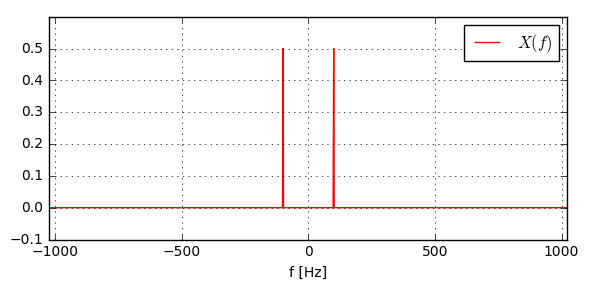

In [7]:
def FFT(x):
    """Perform the FFT with the zero-frequency component at the center of the spectrum."""
    return np.fft.fftshift(np.fft.fft(np.fft.fftshift(x)))/len(x)


fs = 2048 # sampling frequency
N  = 1024 # number of samples

t = 1/fs * np.arange(N) # time axis
f = fs/N * np.arange(-N//2,N//2) # frequency axis with the zero-frequency component at the center of the spectrum

xt = np.cos(2*np.pi*100*t)
X = FFT(xt)

plt.figure(figsize=(6, 3))
plt.plot(f, np.abs(X),'-r',label=r"$X(f)$")
plt.xlabel('f [Hz]')
plt.xlim([-1023,1023])
plt.ylim([-0.1,0.6])
plt.legend()
plt.tight_layout()
plt.grid()

And that finally looks right. What the `np.fft.fftshift` is doing, is basically just moving the frequencies after the first half of the output of `np.fft.fft`, at the beginning of it. In order to come back to the notation we are used to, when we work with signals with paper and pencil, *i.e.:* with the zero-frequency at the center of the plot.

Don't get confused with the slightly different definition of the frequency axis, this is **only** made to put the right labels on the plot and so having the horizontal axis in Hz again.

You can play with the function `FFT` and visualize the **full spectrum** of your favourite signals.

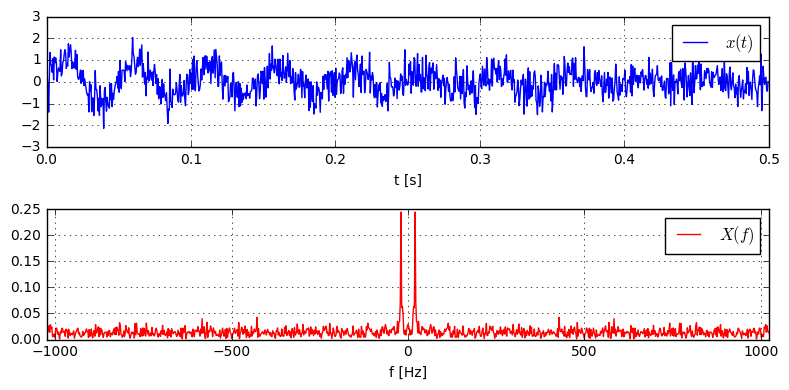

In [8]:
fs = 2048 # sampling frequency
N  = 1024 # number of samples

t = 1/fs * np.arange(N) # time axis
f = fs/N * np.arange(-N//2,N//2) # frequency axis with the zero-frequency component at the center of the spectrum

# some signal in the time domain
xt = np.exp(-t/0.3) * np.sin(2*np.pi*20*t) + 0.5 * np.random.randn(N)

# the signal in the frequency domain
Xf = FFT(xt)

plt.figure(figsize=(8, 4))

plt.subplot(2,1,1)
plt.plot(t, xt,'-b',label=r"$x(t)$")
plt.xlabel('t [s]')
plt.legend()
plt.grid()


plt.subplot(2,1,2)
plt.plot(f, np.abs(Xf),'-r',label=r"$X(f)$")
plt.xlabel('f [Hz]')
plt.xlim([(-N-1),(N-1)])
plt.legend()
plt.tight_layout()
plt.grid()